# AIM

## Objective is to Analyse Laliga Stats for the last 20 seasons 

### Laliga is played in Spain and is the top tier football(Soccer) league and is one of the most competitive leagues in the world

#### My objective is to scrape the data from the online source(mentioned below) to understand and visualize trends 


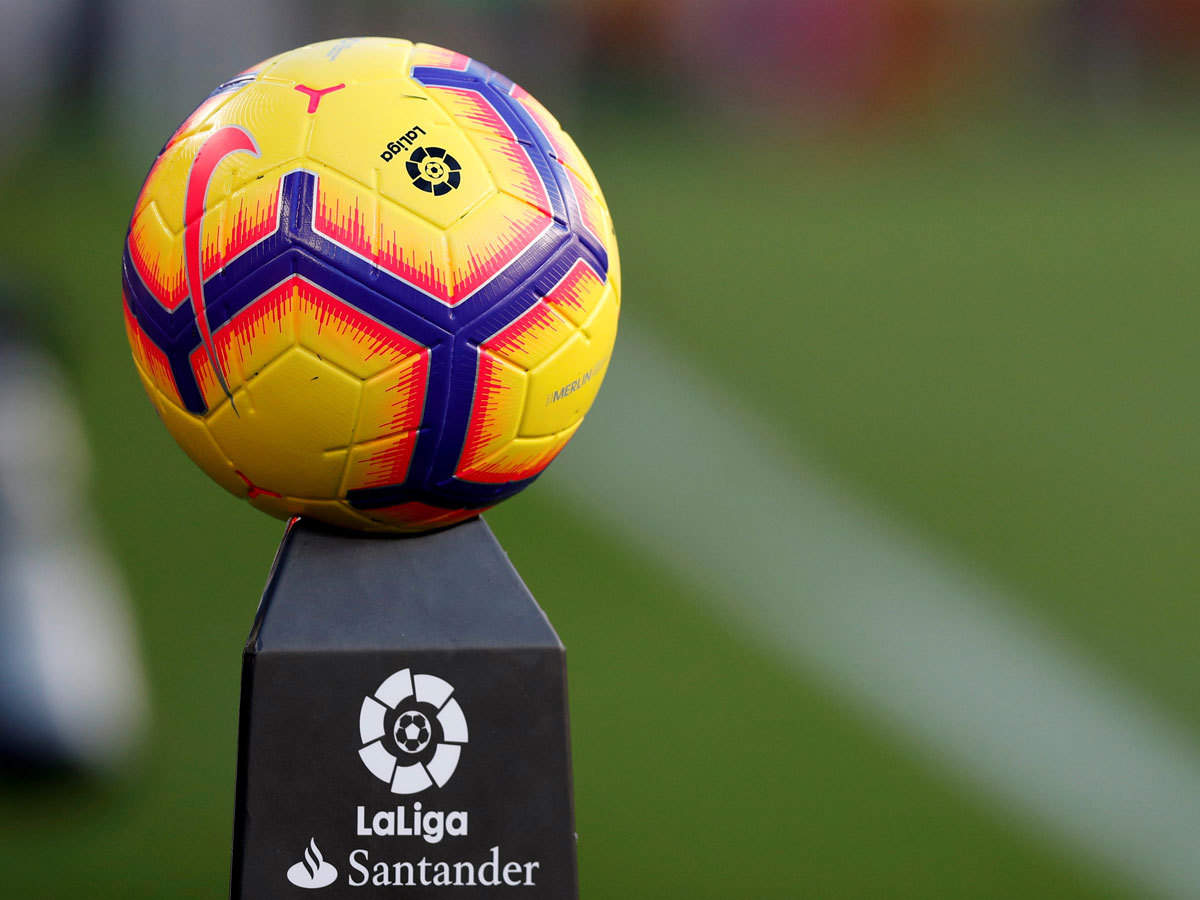

In [1]:
from IPython.display import Image
Image(filename='jpg.jpg')


###### Importing the packages
###### BeautifulSoup is the main package that I used to scrape the data 
###### Other packages such as pandas, numpy are used to manipulate the data 

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import lxml.html as lh
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline

C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Web Scraping

## Source: https://fbref.com/en/comps/12/La-Liga-Stats

### Here, I test to see if I can load data from one single season. The season picked is 2019-20 which is the ongoing season

### Result: Yes, I was able to load the data from the recent season

In [4]:
url = "https://fbref.com/en/comps/12/La-Liga-Stats"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
type(soup)
title = soup.title
print(title)
tables = pd.read_html(url)
print(len(tables))
tables[0].head()


<title>La Liga Stats | FBref.com</title>
2


,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Real Madrid,31,20,8,3,59,21,38,68,52.7,24.2,28.6,0.92,L W W W W,66986,Karim Benzema - 17,Thibaut Courtois,NaN
1,2,Barcelona,31,21,5,5,70,31,39,68,53.5,28.2,25.4,0.82,W W W D W,73588,Lionel Messi - 21,Marc-André ter Stegen,NaN
2,3,Atlético Madrid,31,14,13,4,39,22,17,55,42.3,24.5,17.8,0.57,D D W W W,57320,Álvaro Morata - 9,Jan Oblak,NaN
3,4,Sevilla,31,14,11,6,44,32,12,53,40.3,28.8,11.5,0.37,D W D D D,36562,Lucas Ocampos - 11,Tomáš Vaclík,NaN
4,5,Getafe,31,13,10,8,40,29,11,49,31.8,30.7,1.1,0.04,D L D D D,10857,Ángel Rodríguez - 10,David Soria,NaN


# Summary Functions - Defined

### Function to get the info of the table

In [5]:

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    #summary['Name'] = summary['index']
    #summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

### Function to get Season 

In [6]:
def cw(df):
    df['Season']=''
    df['Start'] = 2020 - df['Index']
    df['End'] = 2020 - df['Index'] +1
    for i in range(len(df)):
        df.iloc[i,len(df.columns)-3] = str( df.iloc[i,len(df.columns)-2]) +'_'+ str(df.iloc[i,len(df.columns)-1])
    return(df)
    

### Function to set the column names correct

In [7]:
def col(df):
    mylist = []
    for i in range(0,len(df.columns)):
        a = df.columns[i]
        t=a[0] + '_' + a[1]
        mylist.append(t)
    df.columns= mylist
    return(df)
   

# Extracting the overall Stats of each team 

## 1) Overall Stats - Team Wise

In [8]:
df = pd.DataFrame()
url = ["https://fbref.com/en/comps/12/La-Liga-Stats",
"https://fbref.com/en/comps/12/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/53/2000-2001-La-Liga-Stats"]
for i in range(len(url)):
    tables = pd.read_html(url[i])[0]
    tables['Index']=i+1
    df = df.append(tables)
cw(df)
resumetable(df)
print(df.head())


Dataset Shape: (400, 23)
   Rk            Squad  MP   W   D  L  GF  GA  GDiff  Pts  ...  xGDiff/90  \
0   1      Real Madrid  31  20   8  3  59  21     38   68  ...       0.92   
1   2        Barcelona  31  21   5  5  70  31     39   68  ...       0.82   
2   3  Atlético Madrid  31  14  13  4  39  22     17   55  ...       0.57   
3   4          Sevilla  31  14  11  6  44  32     12   53  ...       0.37   
4   5           Getafe  31  13  10  8  40  29     11   49  ...       0.04   

      Last 5  Attendance       Top Team Scorer             Goalkeeper  Notes  \
0  L W W W W       66986    Karim Benzema - 17       Thibaut Courtois    NaN   
1  W W W D W       73588     Lionel Messi - 21  Marc-André ter Stegen    NaN   
2  D D W W W       57320     Álvaro Morata - 9              Jan Oblak    NaN   
3  D W D D D       36562    Lucas Ocampos - 11           Tomáš Vaclík    NaN   
4  D L D D D       10857  Ángel Rodríguez - 10            David Soria    NaN   

  Index     Season Start   End 

## 2) Over Stats - Home and Away Wise

In [9]:
df1 = pd.DataFrame()
url = ["https://fbref.com/en/comps/12/La-Liga-Stats",
"https://fbref.com/en/comps/12/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/53/2000-2001-La-Liga-Stats"]
for i in range(len(url)):
    tables = pd.read_html(url[i])[1]
    tables['Index']=i+1
    df1 = df1.append(tables)
cw(df1)
resumetable(df1)
print(df1.head())

Dataset Shape: (400, 32)
  Away                                              ...  Home               \
     D    GA GDiff    GF  L  MP Pts Pts/G  W    xG  ...    xG   xGA xGDiff   
0    4  11.0  13.0  24.0  3  15  28  1.87  8  23.0  ...  29.7  11.5   18.2   
1    4  19.0   3.0  22.0  5  15  22  1.47  6  20.7  ...  32.8  12.7   20.1   
2    8  13.0   5.0  18.0  3  16  23  1.44  5  19.5  ...  22.8   9.4   13.4   
3    5  19.0   4.0  23.0  4  16  26  1.63  7  19.1  ...  21.1  12.7    8.4   
4    4  15.0   3.0  18.0  5  15  22  1.47  6  14.1  ...  17.8  14.7    3.1   

            Index Unnamed: 0_level_0 Unnamed: 1_level_0     Season Start   End  
  xGDiff/90                       Rk              Squad                         
0      1.14     1                  1        Real Madrid  2019_2020  2019  2020  
1      1.25     1                  2          Barcelona  2019_2020  2019  2020  
2      0.89     1                  3    Atlético Madrid  2019_2020  2019  2020  
3      0.56     1      

## 3) Shooting Stats

In [10]:
df_s = pd.DataFrame()

url_s = ["https://fbref.com/en/comps/12/shooting/La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/shooting/53/2000-2001-La-Liga-Stats"
]

for i in range(len(url_s)):
    tables = pd.read_html(url_s[i])[0]
    tables['Index']=i+1
    df_s = df_s.append(tables)
cw(df_s)
resumetable(df_s)
print(df_s.head())


Dataset Shape: (400, 22)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Standard                               \
               Squad               # Pl      Gls PK PKatt   Sh  SoT  FK  SoT%   
0             Alavés                 30       31  5     5  247   83   8  33.6   
1      Athletic Club                 26       32  7     9  326  105  12  32.2   
2    Atlético Madrid                 30       38  2     4  365  117   9  32.1   
3          Barcelona                 28       70  5     5  391  177  32  45.3   
4              Betis                 27       41  6     8  367  120  16  32.7   

          ...       Expected                             Index     Season  \
   Sh/90  ... G/SoT       xG  npxG npxG/Sh  G-xG np:G-xG                    
0   7.97  ...  0.31     32.5  28.7    0.12  -1.5    -2.7     1  2019_2020   
1  10.52  ...  0.24     32.9  26.1    0.08  -0.9    -1.1     1  2019_2020   
2  11.77  ...  0.31     42.3  39.2    0.11  -4.3    -3.2     1  2019_2020   
3  12.61  ...  0.37   

## 4) Passing

In [11]:
df_p = pd.DataFrame()

url_p = ["https://fbref.com/en/comps/12/passing/La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/passing/53/2000-2001-La-Liga-Stats"
]

for i in range(len(url_p)):
    tables = pd.read_html(url_p[i])[0]
    tables['Index']=i+1
    df_p = df_p.append(tables)
cw(df_p)
resumetable(df_p)
print(df_p.head())


Dataset Shape: (400, 28)
  Unnamed: 0_level_0 Unnamed: 1_level_0  Total                               \
               Squad               # Pl    Cmp    Att  Cmp% TotDist PrgDist   
0             Alavés                 30   7994  11308  70.7  170182   70920   
1      Athletic Club                 26  10038  13322  75.3  209718   74723   
2    Atlético Madrid                 30  10921  14134  77.3  204594   78605   
3          Barcelona                 28  19935  22601  88.2  358455  102244   
4              Betis                 27  12898  15580  82.8  252471   76417   

  Short             ... Unnamed: 18_level_0 Unnamed: 19_level_0  \
    Cmp  Att  Cmp%  ...                A-xA                  KP   
0   157  452  34.7  ...               -14.5                 182   
1   186  521  35.7  ...               -14.9                 228   
2   325  664  48.9  ...               -13.3                 275   
3   408  850  48.0  ...                -1.5                 306   
4   291  681  42.7 

## 5) Defense

In [12]:
df_d = pd.DataFrame()

url_d = ["https://fbref.com/en/comps/12/defense/La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/defense/53/2000-2001-La-Liga-Stats"
]

for i in range(len(url_d)):
    tables = pd.read_html(url_d[i])[0]
    tables['Index']=i+1
    df_d = df_d.append(tables)
    
cw(df_d)
resumetable(df_d)
print(df_d.head())


Dataset Shape: (400, 28)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Tackles                               \
               Squad               # Pl     Tkl TklW Def 3rd Mid 3rd Att 3rd   
0             Alavés                 30     513  309     245     225      43   
1      Athletic Club                 26     471  285     233     178      60   
2    Atlético Madrid                 30     536  345     240     229      67   
3          Barcelona                 28     452  309     191     188      73   
4              Betis                 27     441  272     244     148      49   

  Vs Dribbles             ... Blocks           Unnamed: 21_level_0  \
          Tkl  Att  Tkl%  ...     Sh ShSv Pass                 Int   
0         158  471  33.5  ...    102    0  367                 345   
1         152  506  30.0  ...     79    2  398                 316   
2         209  551  37.9  ...    103    0  430                 356   
3         136  361  37.7  ...     72    4  313                 2

## 6) Goal Keeping 

In [13]:
df_gk = pd.DataFrame()

url_gk = ["https://fbref.com/en/comps/12/keepersadv/La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/keepersadv/53/2000-2001-La-Liga-Stats"
]

for i in range(len(url_gk)):
    tables = pd.read_html(url_gk[i])[0]
    tables['Index']=i+1
    df_gk = df_gk.append(tables)
cw(df_gk)
resumetable(df_gk)
print(df_gk.head())


Dataset Shape: (400, 32)
  Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Goals               \
               Squad               # Pl                90s    GA PKA FK CK OG   
0             Alavés                  3               31.0    46  10  3  3  0   
1      Athletic Club                  2               31.0    27   3  1  2  2   
2    Atlético Madrid                  2               31.0    22   1  1  4  1   
3          Barcelona                  2               31.0    31   4  1  1  0   
4              Betis                  2               31.0    48  10  0  3  1   

  Expected           ... Crosses          Sweeper                 Index  \
      PSxG PSxG/SoT  ...     Opp Stp Stp%    #OPA #OPA/90 AvgDist         
0     42.6     0.31  ...     295  20  6.8      11    0.36    13.6     1   
1     33.5     0.32  ...     306  25  8.2      16    0.52    14.1     1   
2     19.8     0.22  ...     282  14  5.0      15    0.48    14.0     1   
3     27.1     0.26  ...     231

## 7) Posession

In [14]:
df_pos = pd.DataFrame()

url_pos = ["https://fbref.com/en/comps/12/posession/La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/1886/2018-2019-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/1652/2017-2018-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/1547/2016-2017-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/1488/2015-2016-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/755/2014-2015-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/690/2013-2014-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/624/2012-2013-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/557/2011-2012-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/488/2010-2011-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/422/2009-2010-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/355/2008-2009-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/299/2007-2008-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/245/2006-2007-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/196/2005-2006-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/158/2004-2005-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/124/2003-2004-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/93/2002-2003-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/70/2001-2002-La-Liga-Stats",
"https://fbref.com/en/comps/12/posession/53/2000-2001-La-Liga-Stats"
]

for i in range(len(url_pos)):
    tables = pd.read_html(url_pos[i])[0]
    tables['Index']=i+1
    df_pos = df_pos.append(tables)
cw(df_pos)
resumetable(df_pos)
print(df_pos.head())


Dataset Shape: (400, 23)
   Rk            Squad  MP   W   D  L  GF  GA  GDiff  Pts  ...  xGDiff/90  \
0   1      Real Madrid  31  20   8  3  59  21     38   68  ...       0.92   
1   2        Barcelona  31  21   5  5  70  31     39   68  ...       0.82   
2   3  Atlético Madrid  31  14  13  4  39  22     17   55  ...       0.57   
3   4          Sevilla  31  14  11  6  44  32     12   53  ...       0.37   
4   5           Getafe  31  13  10  8  40  29     11   49  ...       0.04   

      Last 5  Attendance       Top Team Scorer             Goalkeeper  Notes  \
0  L W W W W       66986    Karim Benzema - 17       Thibaut Courtois    NaN   
1  W W W D W       73588     Lionel Messi - 21  Marc-André ter Stegen    NaN   
2  D D W W W       57320     Álvaro Morata - 9              Jan Oblak    NaN   
3  D W D D D       36562    Lucas Ocampos - 11           Tomáš Vaclík    NaN   
4  D L D D D       10857  Ángel Rodríguez - 10            David Soria    NaN   

  Index     Season  Start   End

# Duplicating the Data frames so that I need not scrape again

In [15]:
ovr = df
h_a = df1
shoo = df_s
pas = df_p
defe = df_d
gk = df_gk
pos = df_pos

# Changing column names 

In [16]:
#col(ovr)
col(h_a)
col(shoo)
col(pas)
col(defe)
col(gk)
#col(pos)


,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist,Index_,Season_,Start_,End_
0,Alavés,3,31.0,46,10,3,3,0,42.6,0.31,...,295,20,6.8,11,0.36,13.6,1,2019_2020,2019,2020
1,Athletic Club,2,31.0,27,3,1,2,2,33.5,0.32,...,306,25,8.2,16,0.52,14.1,1,2019_2020,2019,2020
2,Atlético Madrid,2,31.0,22,1,1,4,1,19.8,0.22,...,282,14,5.0,15,0.48,14.0,1,2019_2020,2019,2020
3,Barcelona,2,31.0,31,4,1,1,0,27.1,0.26,...,231,11,4.8,22,0.71,14.7,1,2019_2020,2019,2020
4,Betis,2,31.0,48,10,0,3,1,42.6,0.29,...,303,21,6.9,24,0.77,14.9,1,2019_2020,2019,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Real Sociedad,2,31.0,39,6,2,3,1,37.0,0.27,...,247,17,6.9,23,0.74,16.3,20,2000_2001,2000,2001
16,Sevilla,2,31.0,32,3,3,3,1,27.0,0.27,...,252,19,7.5,14,0.45,14.0,20,2000_2001,2000,2001
17,Valencia,2,31.0,44,5,2,7,1,45.3,0.26,...,358,24,6.7,14,0.45,12.9,20,2000_2001,2000,2001
18,Valladolid,2,31.0,36,5,2,4,0,39.0,0.31,...,323,16,5.0,9,0.29,11.7,20,2000_2001,2000,2001


# 

# Checking the columns

In [17]:
ovr.head() 

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,...,xGDiff/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,Index,Season,Start,End
0,1,Real Madrid,31,20,8,3,59,21,38,68,...,0.92,L W W W W,66986,Karim Benzema - 17,Thibaut Courtois,NaN,1,2019_2020,2019,2020
1,2,Barcelona,31,21,5,5,70,31,39,68,...,0.82,W W W D W,73588,Lionel Messi - 21,Marc-André ter Stegen,NaN,1,2019_2020,2019,2020
2,3,Atlético Madrid,31,14,13,4,39,22,17,55,...,0.57,D D W W W,57320,Álvaro Morata - 9,Jan Oblak,NaN,1,2019_2020,2019,2020
3,4,Sevilla,31,14,11,6,44,32,12,53,...,0.37,D W D D D,36562,Lucas Ocampos - 11,Tomáš Vaclík,NaN,1,2019_2020,2019,2020
4,5,Getafe,31,13,10,8,40,29,11,49,...,0.04,D L D D D,10857,Ángel Rodríguez - 10,David Soria,NaN,1,2019_2020,2019,2020


In [18]:
h_a.head()

,Away_D,Away_GA,Away_GDiff,Away_GF,Away_L,Away_MP,Away_Pts,Away_Pts/G,Away_W,Away_xG,...,Home_xG,Home_xGA,Home_xGDiff,Home_xGDiff/90,Index_,Unnamed: 0_level_0_Rk,Unnamed: 1_level_0_Squad,Season_,Start_,End_
0,4,11.0,13.0,24.0,3,15,28,1.87,8,23.0,...,29.7,11.5,18.2,1.14,1,1,Real Madrid,2019_2020,2019,2020
1,4,19.0,3.0,22.0,5,15,22,1.47,6,20.7,...,32.8,12.7,20.1,1.25,1,2,Barcelona,2019_2020,2019,2020
2,8,13.0,5.0,18.0,3,16,23,1.44,5,19.5,...,22.8,9.4,13.4,0.89,1,3,Atlético Madrid,2019_2020,2019,2020
3,5,19.0,4.0,23.0,4,16,26,1.63,7,19.1,...,21.1,12.7,8.4,0.56,1,4,Sevilla,2019_2020,2019,2020
4,4,15.0,3.0,18.0,5,15,22,1.47,6,14.1,...,17.8,14.7,3.1,0.19,1,5,Getafe,2019_2020,2019,2020


In [19]:
shoo.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Standard_Gls,Standard_PK,Standard_PKatt,Standard_Sh,Standard_SoT,Standard_FK,Standard_SoT%,Standard_Sh/90,...,Standard_G/SoT,Expected_xG,Expected_npxG,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Index_,Season_,Start_,End_
0,Alavés,30,31,5,5,247,83,8,33.6,7.97,...,0.31,32.5,28.7,0.12,-1.5,-2.7,1,2019_2020,2019,2020
1,Athletic Club,26,32,7,9,326,105,12,32.2,10.52,...,0.24,32.9,26.1,0.08,-0.9,-1.1,1,2019_2020,2019,2020
2,Atlético Madrid,30,38,2,4,365,117,9,32.1,11.77,...,0.31,42.3,39.2,0.11,-4.3,-3.2,1,2019_2020,2019,2020
3,Barcelona,28,70,5,5,391,177,32,45.3,12.61,...,0.37,53.5,49.8,0.13,16.5,15.2,1,2019_2020,2019,2020
4,Betis,27,41,6,8,367,120,16,32.7,11.84,...,0.29,38.9,33.0,0.09,2.1,2.0,1,2019_2020,2019,2020


In [20]:
pas.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,...,Unnamed: 18_level_0_A-xA,Unnamed: 19_level_0_KP,Unnamed: 20_level_0_1/3,Unnamed: 21_level_0_PPA,Unnamed: 22_level_0_CrsPA,Unnamed: 23_level_0_Prog,Index_,Season_,Start_,End_
0,Alavés,30,7994,11308,70.7,170182,70920,157,452,34.7,...,-14.5,182,630,150,43,1008,1,2019_2020,2019,2020
1,Athletic Club,26,10038,13322,75.3,209718,74723,186,521,35.7,...,-14.9,228,741,184,67,1173,1,2019_2020,2019,2020
2,Atlético Madrid,30,10921,14134,77.3,204594,78605,325,664,48.9,...,-13.3,275,829,240,46,1318,1,2019_2020,2019,2020
3,Barcelona,28,19935,22601,88.2,358455,102244,408,850,48.0,...,-1.5,306,1482,353,44,1486,1,2019_2020,2019,2020
4,Betis,27,12898,15580,82.8,252471,76417,291,681,42.7,...,-8.9,272,743,270,75,1086,1,2019_2020,2019,2020


In [21]:
defe.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Tackles_Tkl,Tackles_TklW,Tackles_Def 3rd,Tackles_Mid 3rd,Tackles_Att 3rd,Vs Dribbles_Tkl,Vs Dribbles_Att,Vs Dribbles_Tkl%,...,Blocks_Sh,Blocks_ShSv,Blocks_Pass,Unnamed: 21_level_0_Int,Unnamed: 22_level_0_Clr,Unnamed: 23_level_0_Err,Index_,Season_,Start_,End_
0,Alavés,30,513,309,245,225,43,158,471,33.5,...,102,0,367,345,923,8,1,2019_2020,2019,2020
1,Athletic Club,26,471,285,233,178,60,152,506,30.0,...,79,2,398,316,1025,6,1,2019_2020,2019,2020
2,Atlético Madrid,30,536,345,240,229,67,209,551,37.9,...,103,0,430,356,870,4,1,2019_2020,2019,2020
3,Barcelona,28,452,309,191,188,73,136,361,37.7,...,72,4,313,285,538,8,1,2019_2020,2019,2020
4,Betis,27,441,272,244,148,49,130,412,31.6,...,124,1,371,275,801,4,1,2019_2020,2019,2020


In [22]:
gk.head()

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist,Index_,Season_,Start_,End_
0,Alavés,3,31.0,46,10,3,3,0,42.6,0.31,...,295,20,6.8,11,0.36,13.6,1,2019_2020,2019,2020
1,Athletic Club,2,31.0,27,3,1,2,2,33.5,0.32,...,306,25,8.2,16,0.52,14.1,1,2019_2020,2019,2020
2,Atlético Madrid,2,31.0,22,1,1,4,1,19.8,0.22,...,282,14,5.0,15,0.48,14.0,1,2019_2020,2019,2020
3,Barcelona,2,31.0,31,4,1,1,0,27.1,0.26,...,231,11,4.8,22,0.71,14.7,1,2019_2020,2019,2020
4,Betis,2,31.0,48,10,0,3,1,42.6,0.29,...,303,21,6.9,24,0.77,14.9,1,2019_2020,2019,2020


In [23]:
pos.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,...,xGDiff/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,Index,Season,Start,End
0,1,Real Madrid,31,20,8,3,59,21,38,68,...,0.92,L W W W W,66986,Karim Benzema - 17,Thibaut Courtois,NaN,1,2019_2020,2019,2020
1,2,Barcelona,31,21,5,5,70,31,39,68,...,0.82,W W W D W,73588,Lionel Messi - 21,Marc-André ter Stegen,NaN,1,2019_2020,2019,2020
2,3,Atlético Madrid,31,14,13,4,39,22,17,55,...,0.57,D D W W W,57320,Álvaro Morata - 9,Jan Oblak,NaN,1,2019_2020,2019,2020
3,4,Sevilla,31,14,11,6,44,32,12,53,...,0.37,D W D D D,36562,Lucas Ocampos - 11,Tomáš Vaclík,NaN,1,2019_2020,2019,2020
4,5,Getafe,31,13,10,8,40,29,11,49,...,0.04,D L D D D,10857,Ángel Rodríguez - 10,David Soria,NaN,1,2019_2020,2019,2020


# Overall Plots

## Season wise Wins

- Average Wins per team seems to be around 14 per season 
- The outliers on the top seem to be the winners of the leage that season 


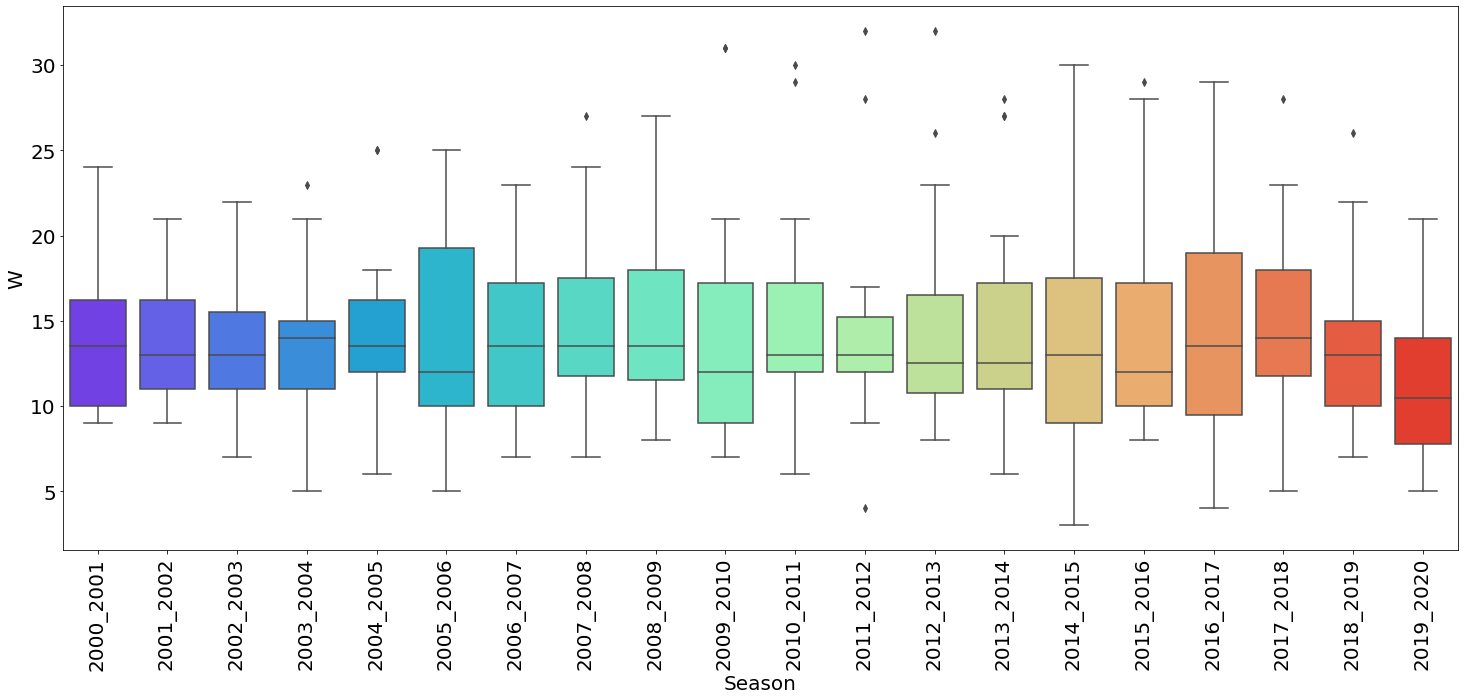

In [44]:
x = ovr.groupby(["Squad","Season"]).agg({"W":"sum"}).reset_index()
plt.figure(figsize=(25,10))
sns.boxplot(x = x["Season"],y = x["W"],palette="rainbow")
plt.xticks(rotation='vertical')
plt.rc('font', size=20)

## Club Wise Wins

- We can See that Barcelona and Real Madrid Stand out of the pack of teams while other teams such as Atletico Madrid, Valencia are slightly behind. 

- Atletico Madrid's long tail suggests that they were so inconsistent in the last couple of decades
- Single lines/Very small box plots suggest that those clubs have been in the Laliga for a very few seasons. Cadiz, Cordoba, Real Murcia are examples of this

Text(0.5, 1.0, 'WINS BY TEAMS')

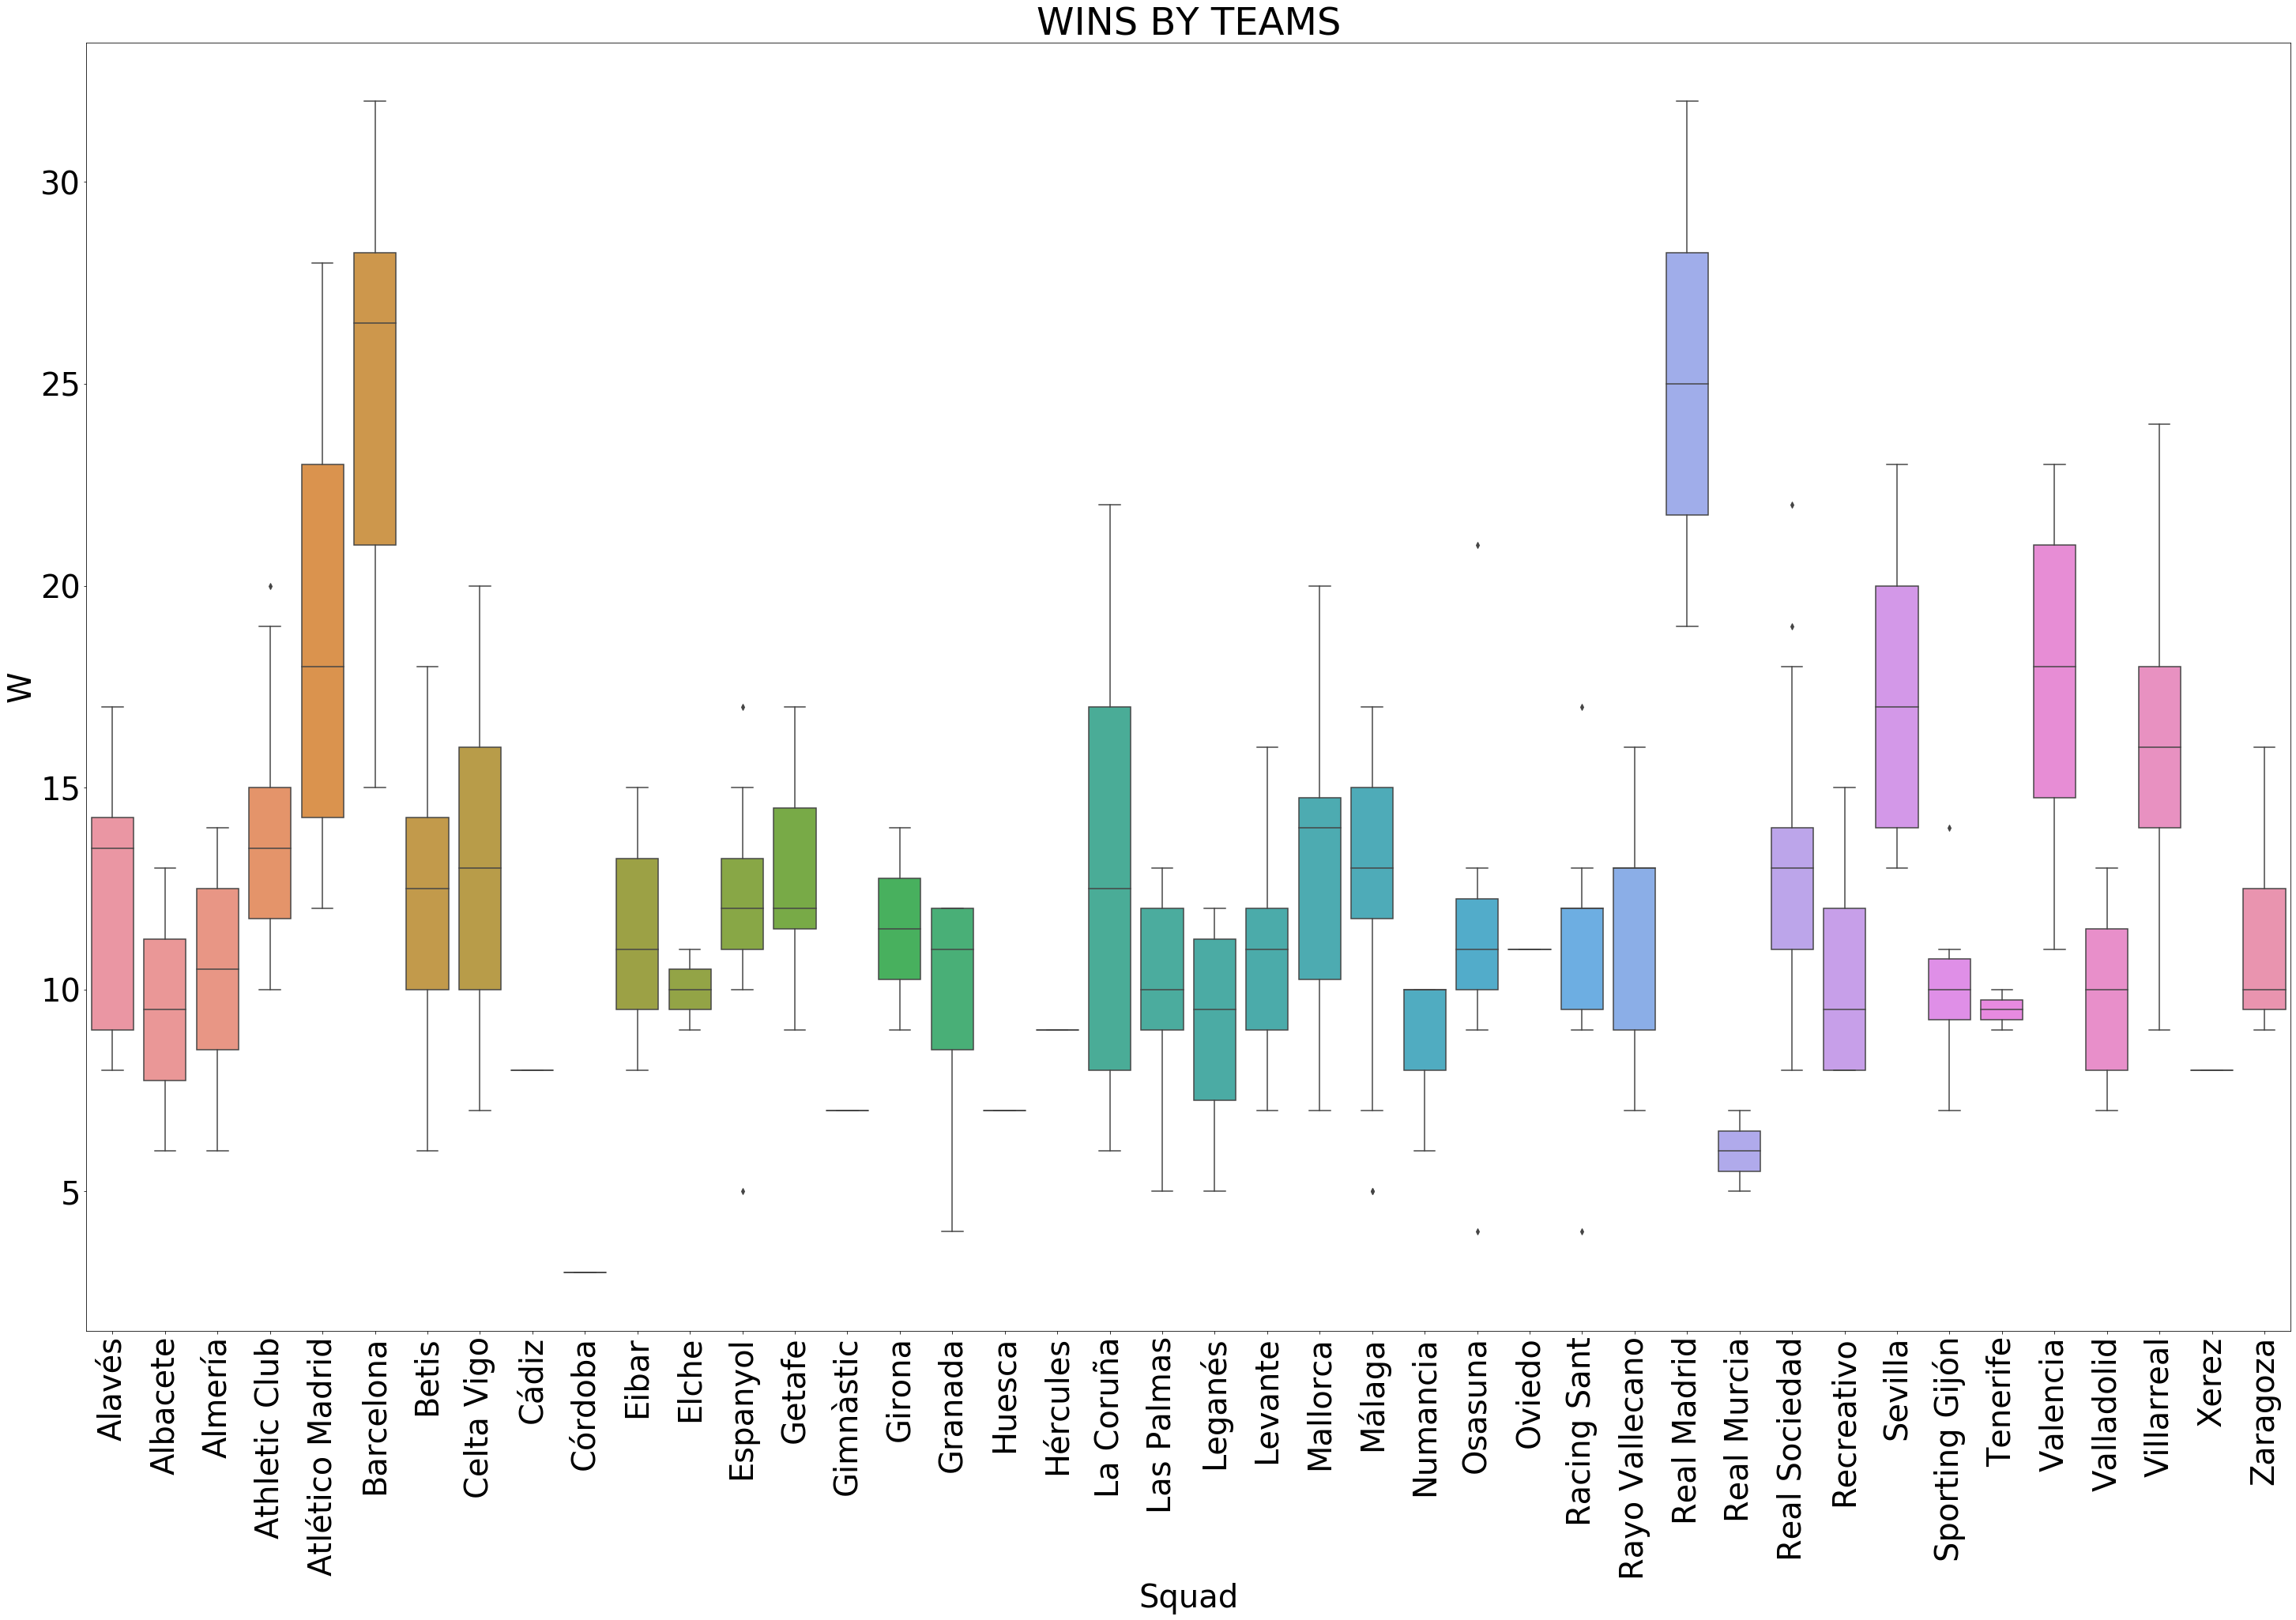

In [42]:
plt.figure(figsize=(50,30))
plt.xticks(rotation='vertical')
plt.rc('font', size=40)
sns.boxplot(x = x["Squad"],y = x["W"])
plt.title("WINS BY TEAMS")


## Goals Scored - Season
- A lot of Red and Lite Blue suggesting the goals scored is dominated by Barcelona and Real Madrid respectively
- 2008-09 Season saw a lot of teams score similar number of goals as we can see the boxes are similar for most teams 

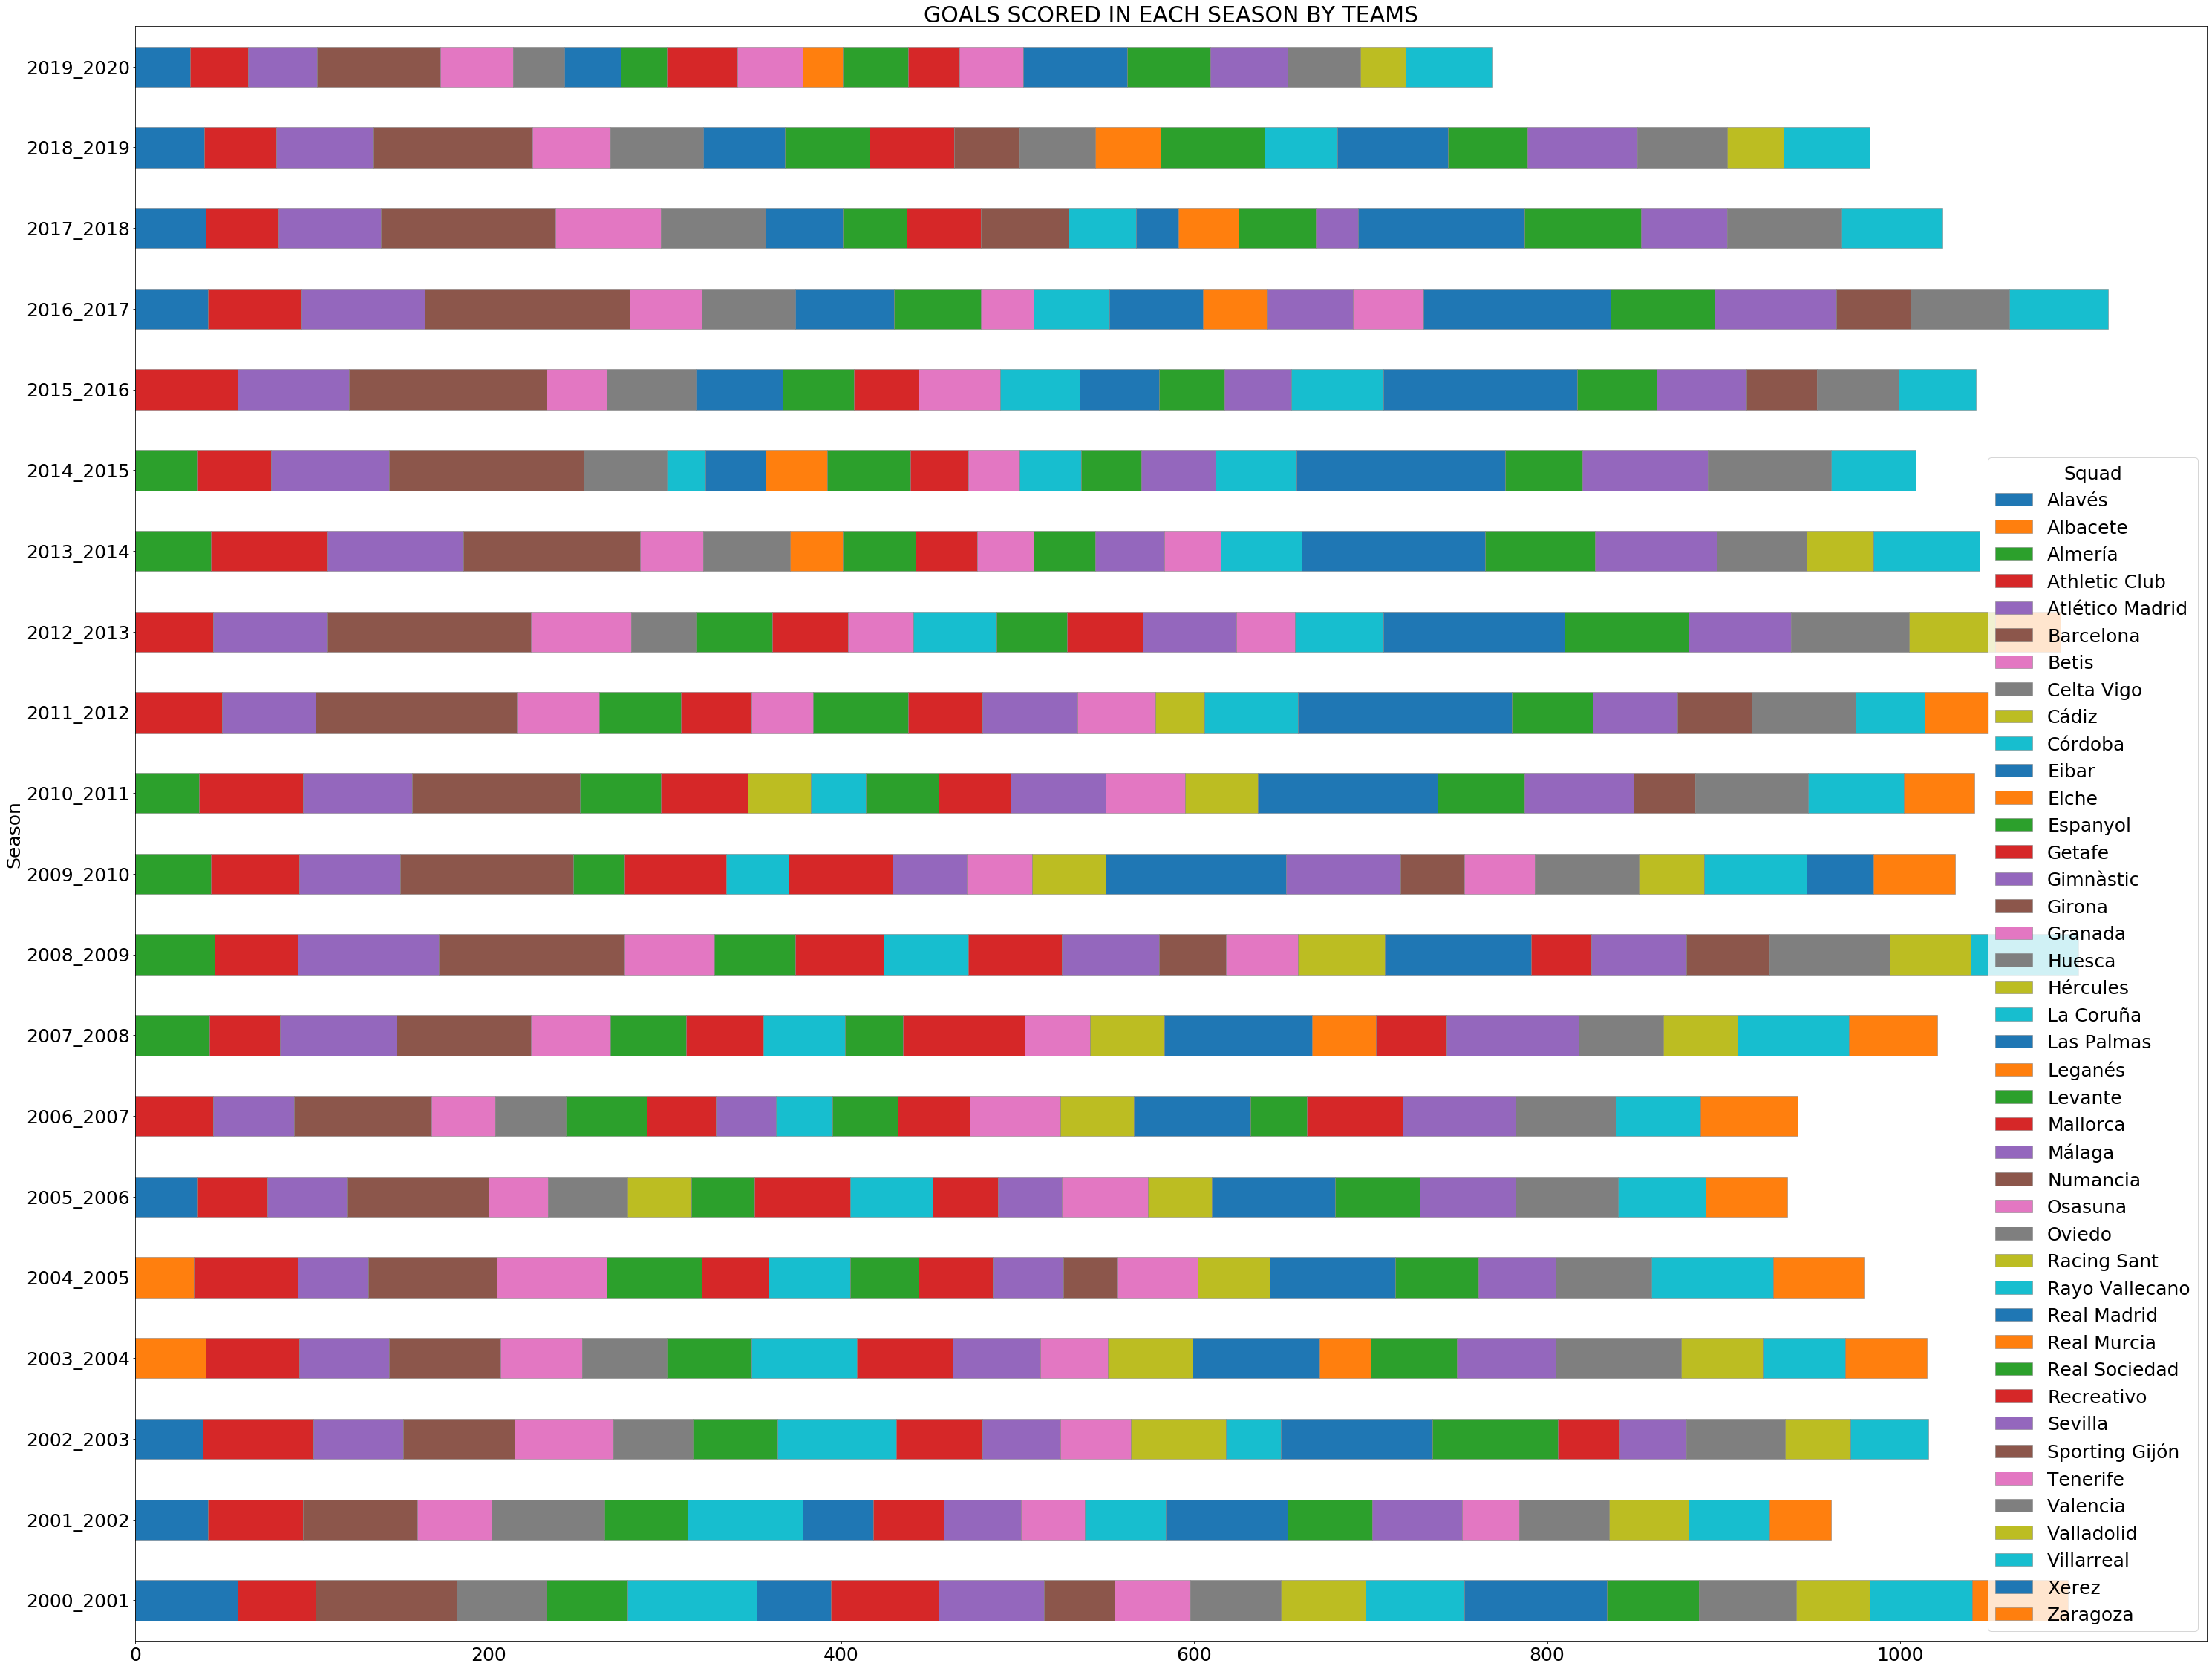

In [246]:
pvt = pd.pivot_table(index="Season",columns="Squad",values="GF",data=ovr,aggfunc="sum")
pvt.plot(kind = "barh",stacked = True,figsize =(50,40),
         linewidth = .5,edgecolor = ["grey"]*5)
plt.title("GOALS SCORED IN EACH SEASON BY TEAMS")
plt.rc('font', size=25)
plt.show()

# Top Scorers

- The Names of "Diego" and "Garcia" standout as top scorers. This can be due to multiple Diego's and "Garcia's" for different clubs
- "Linonel Messi" appears the next big player
- "Aritz Aduriz, Raul and Cristiano Ronaldo appear slightly smaller as they did not play all the 20 seasons"

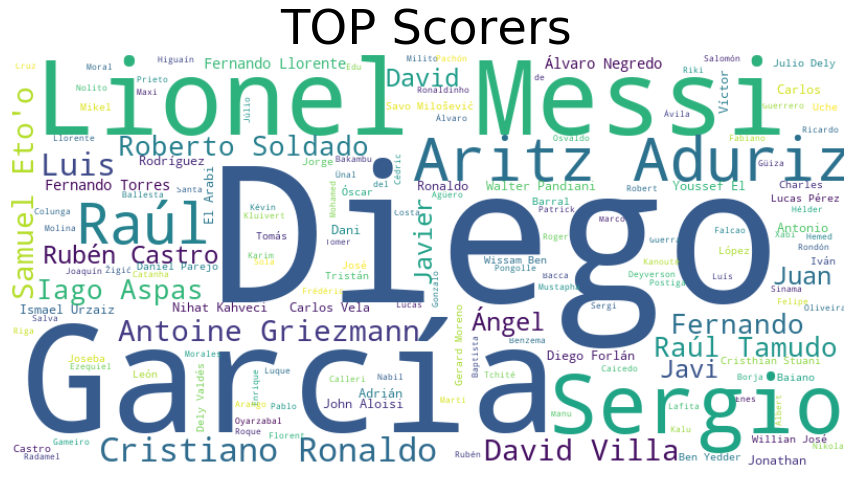

In [30]:
from wordcloud import WordCloud
import nltk
wc = WordCloud(background_color="white",scale=2).generate(" ".join(ovr['Top Team Scorer']))
fig = plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP Scorers")
plt.show()

# Distribution of Home and Away Goals Scored vs Conceeded
- Mean of Away Goals Conceeded > Home Goals Conceeded
- Mean of Home Goals Fired > Away Goals Fired 
- Overall, we see how Home vs Away factor is vital for teams which indicate that support of their fans along with the atmosphere play a vital role to secure points 
- Home Goals Fired is heavily right skewed due to some teams scoring very high amount of goals 
- Overall we see that the mean of " Away Goals Conceeded" being the highest amon these 4 metrics

C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\vamsi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


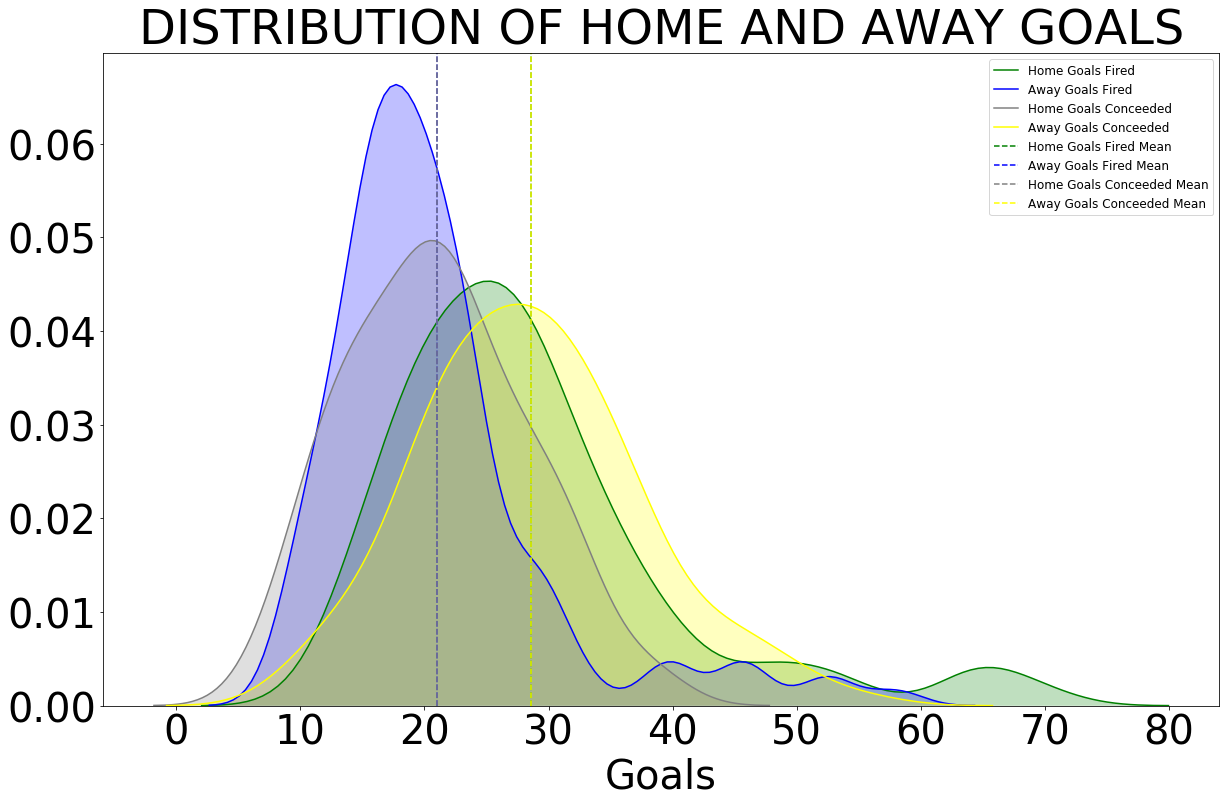

In [31]:
plt.figure(figsize=(20,12))
sns.kdeplot(h_a["Home_GF"],shade=True,
            color="g",label="Home Goals Fired")
sns.kdeplot(h_a["Away_GF"],shade=True,
            color="b",label="Away Goals Fired")
sns.kdeplot(h_a["Home_GA"],shade=True,
            color="grey",label="Home Goals Conceeded")
sns.kdeplot(h_a["Away_GA"],shade=True,
            color="yellow",label="Away Goals Conceeded")
plt.axvline(h_a["Home_GF"].mean(),linestyle = "dashed",
            color="g",label="Home Goals Fired Mean")
plt.axvline(h_a["Away_GF"].mean(),linestyle = "dashed",
            color="b",label="Away Goals Fired Mean")
plt.axvline(h_a["Home_GA"].mean(),linestyle = "dashed",
            color="grey",label="Home Goals Conceeded Mean")
plt.axvline(h_a["Away_GA"].mean(),linestyle = "dashed",
            color="yellow",label="Away Goals Conceeded Mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("Goals")
plt.rc('font', size=15)
plt.show()

# Density Plot between Free Kicks and Penalty Kicks

C:\Users\vamsi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2880x1440 with 0 Axes>

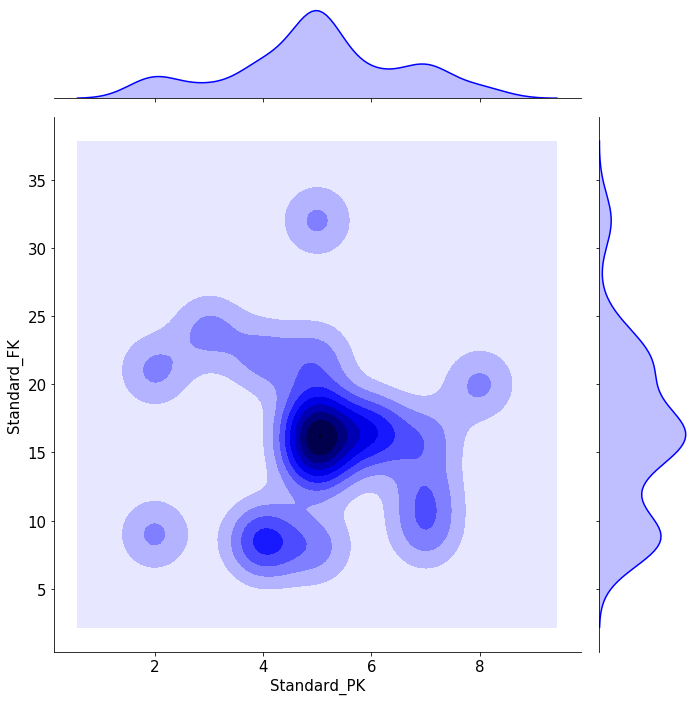

In [32]:
plt.figure(figsize=(40,20))
sns.jointplot(shoo["Standard_PK"],shoo["Standard_FK"],kind="kde",color="b",size = 10)

plt.show()

# Complete - Table 

- Barcalona is the team with the highest points accumulated - 1644
- Real Madrid is the team with highest wins - 499 pipping their rivals by one more win
- Levante has the worst Goal Difference of all the teams with "-202"
- Vallodolid has the highest Free Kick attempts per season with 23
- Camp Nou has the highest Avg. Attendance(Can be attributed to its capacity as well) - 73.2K 

In [33]:
pvt1 = pd.pivot_table(index="Squad",values=["W","D","L","Pts","GDiff"],data=ovr,aggfunc="sum")
pvt1= pvt1.sort_values('Pts',ascending=False)
pvt2= pd.pivot_table(index="Squad",values="Season",data=ovr,aggfunc="count")
pvt3= pd.pivot_table(index="Squad",values="Attendance",data=ovr,aggfunc="mean")
shoo.rename({'Unnamed: 0_level_0_Squad':'Squad'},axis=1, inplace=True)
pvt4= pd.pivot_table(index="Squad",values=["Standard_PK","Standard_FK","Standard_Sh","Standard_SoT","Standard_G/Sh"],data=shoo,aggfunc="mean")


pvt1 = pvt1.merge(pvt2, how='left',on='Squad')
pvt1 = pvt1.merge(pvt3, how='left',on='Squad')
pvt1 = pvt1.merge(pvt4, how='left',on='Squad')
pvt1.rename({'Season': 'Seasons in Laliga', 'Attendance': 'Avg.Attendance','Standard_PK':'Avg. Penalties Per Season','Standard_FK':'Avg. Freekicks Per Season','Standard_Sh':'Avg. Shots Per Season','Standard_SoT':'Avg. Shots on target Per Season'}, axis=1, inplace=True)
pvt1

,D,GDiff,L,Pts,W,Seasons in Laliga,Avg.Attendance,Avg. Freekicks Per Season,Standard_G/Sh,Avg. Penalties Per Season,Avg. Shots Per Season,Avg. Shots on target Per Season
Squad,,,,,,,,,,,,
Barcelona,150,1117,104,1647,499,20,73118.650000,32.0,0.17,5.0,391.0,177.0
Real Madrid,127,980,125,1630,501,20,67881.400000,16.0,0.11,7.0,477.0,188.0
Valencia,192,297,210,1245,351,20,40108.450000,15.0,0.13,5.0,267.0,95.0
Atlético Madrid,162,358,177,1176,338,18,45180.555556,9.0,0.10,2.0,365.0,117.0
Sevilla,161,213,226,1145,328,19,34916.578947,14.0,0.10,5.0,387.0,133.0
Villarreal,187,132,228,1087,300,19,17207.684211,9.0,0.10,7.0,402.0,133.0
Athletic Club,200,-37,276,1031,277,20,36087.100000,12.0,0.08,7.0,326.0,105.0
Espanyol,193,-187,315,928,245,20,22530.950000,9.0,0.06,4.0,332.0,102.0
Real Sociedad,156,-26,250,855,233,17,23621.529412,8.0,0.12,4.0,342.0,113.0


# How the Win - Lost - Draw numbers fare for different teams in a 3-D Space

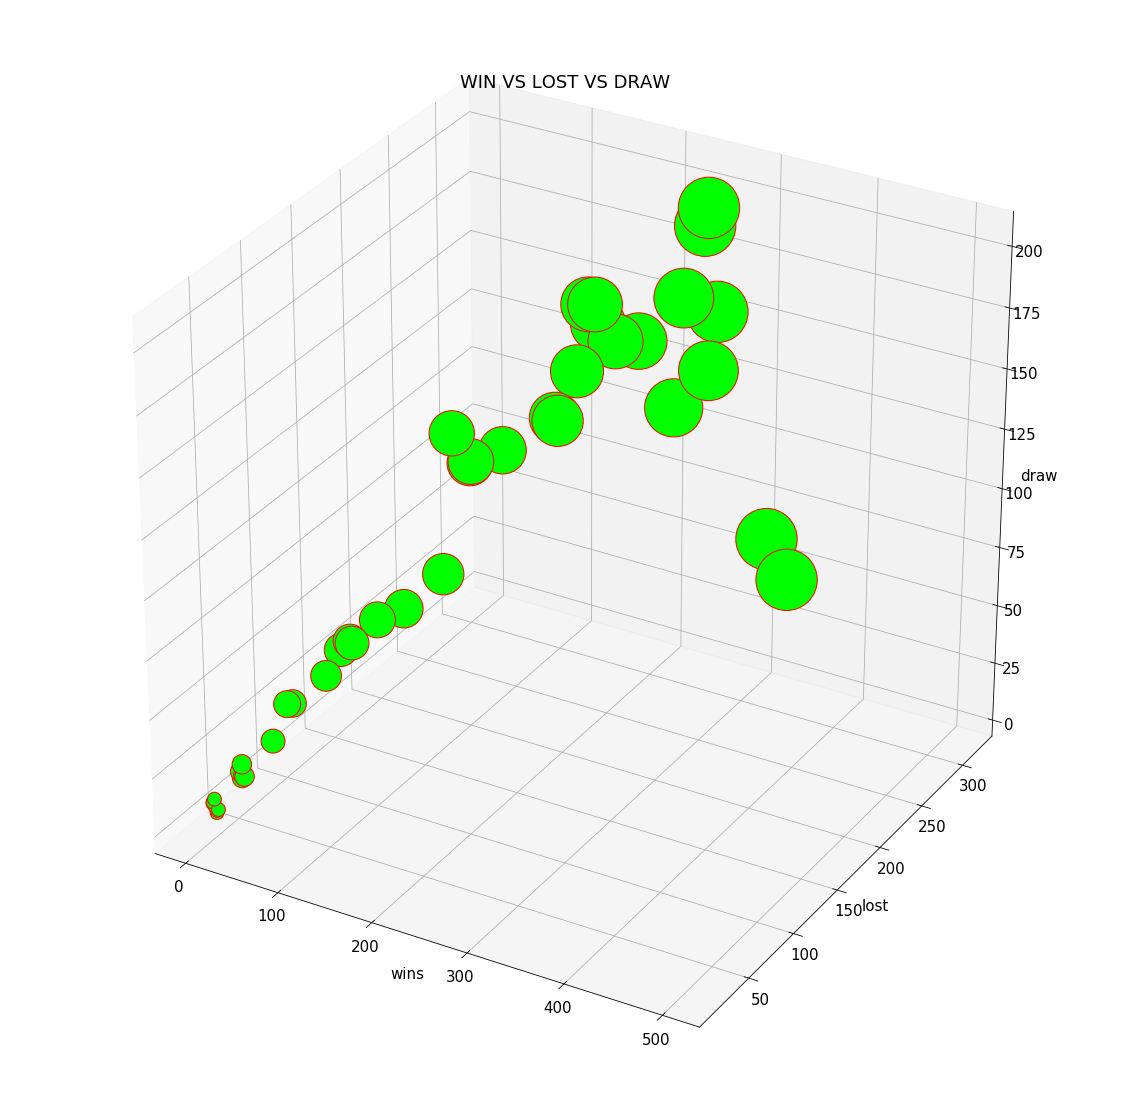

In [34]:
#fig , axes = plt.subplots(111,projection ="3d",nrows=1, ncols=2)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(111,projection ="3d")
ax.scatter(pvt1["W"],pvt1["L"],pvt1["D"],s=(pvt1["W"] + pvt1["L"] + pvt1["D"]) *5,
           alpha=1,linewidth =1,edgecolor= "r",c = "lime")
ax.set_xlabel("wins")
ax.set_ylabel("lost")
ax.set_zlabel("draw")
plt.title("WIN VS LOST VS DRAW")
plt.show()


# Scatter Plot - Wins vs Season 

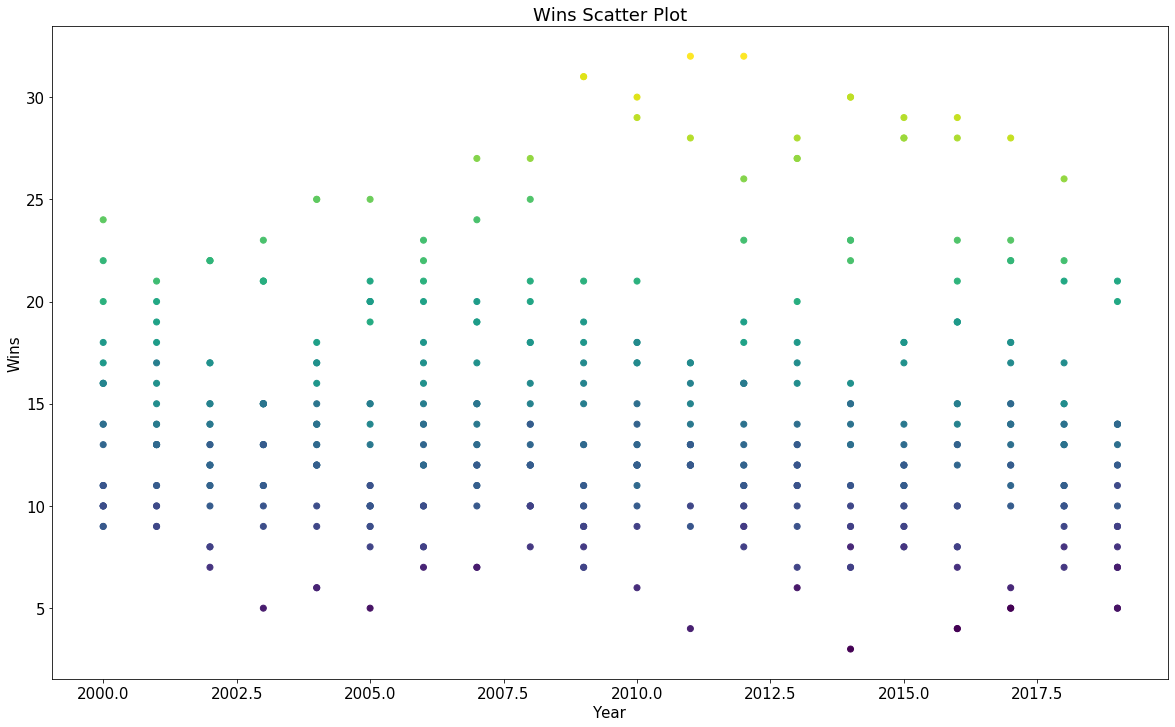

In [35]:
fig = plt.figure(figsize=(20,12))
plt.scatter(ovr['Start'], ovr['W'], c=ovr['Pts'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.show()

# How the Avg. Win - Loss - Draw Figures compare at a Season Level

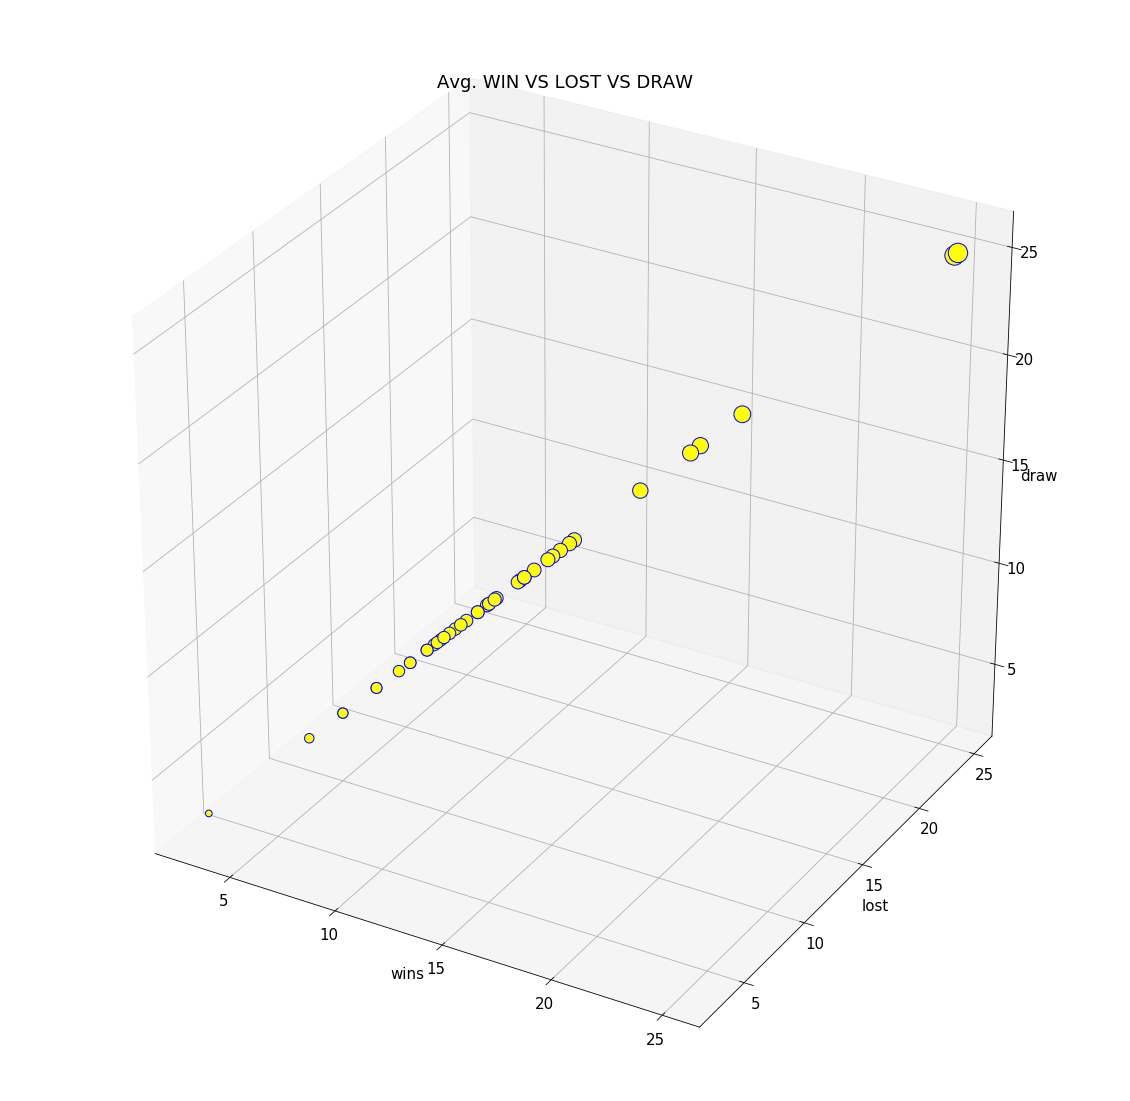

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(111,projection ="3d")
ax.scatter(pvt1["W"]/pvt1["Seasons in Laliga"],pvt1["W"]/pvt1["Seasons in Laliga"],pvt1["W"]/pvt1["Seasons in Laliga"],s=(pvt1["W"]/pvt1["Seasons in Laliga"] + pvt1["W"]/pvt1["Seasons in Laliga"] + pvt1["W"]/pvt1["Seasons in Laliga"]) *5,
           alpha=1,linewidth =1,edgecolor= "b",c = "yellow")
ax.set_xlabel("wins")
ax.set_ylabel("lost")
ax.set_zlabel("draw")
plt.title("Avg. WIN VS LOST VS DRAW")
plt.show()

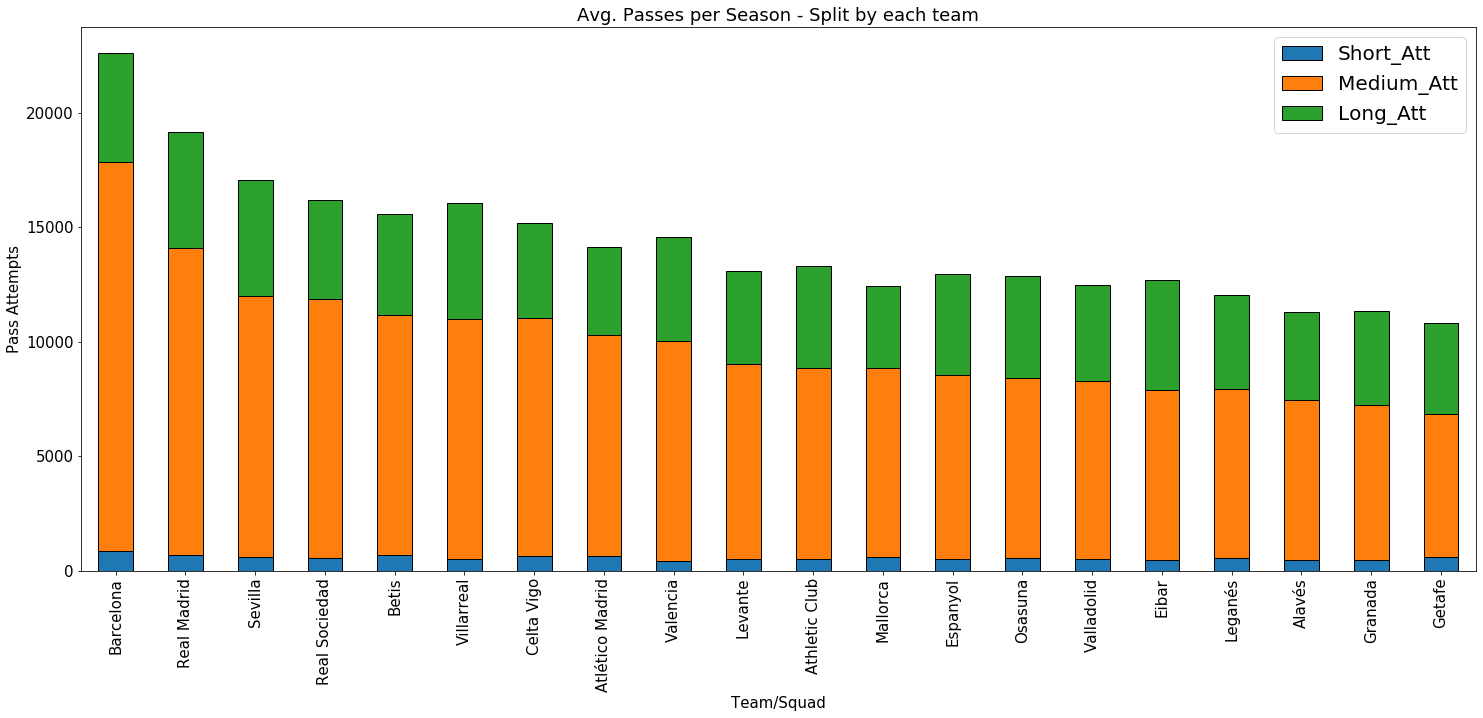

In [37]:
pvt5 = pd.pivot_table(index="Unnamed: 0_level_0_Squad",values=["Short_Att","Medium_Att","Long_Att"],data=pas,aggfunc="mean")
#pvt5.index = pvt5.`Unnamed: 0_level_0_Squad`
pvt5= pvt5.sort_values('Medium_Att',ascending=False)
pvt5[["Short_Att","Medium_Att","Long_Att"]].plot(kind = "bar",figsize=(25,10),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*30
                                  )
plt.legend(loc="best",prop = {"size" : 20})
plt.title("Avg. Passes per Season - Split by each team")
plt.xlabel("Team/Squad")
plt.ylabel("Pass Attempts")
plt.show()

# Now Let's look at some Shooting Stats 

## Function for Radar

In [239]:
def rdr(num,c,play,cols,string):
    plt.figure(figsize=(15,25))
    for i,j,k in itertools.zip_longest(num,range(len(num)),c):
        plt.subplot(4,2,j+1,projection="polar")
        cats = list(play)[1:]
        N    = len(cats)
        values = play.loc[i].drop("Squad").values.flatten().tolist()
        values += values[:1]
        values
        angles = [n / float(N)*2*pi for n in range(N)]
        angles += angles[:1]
        angles

        plt.xticks(angles[:-1],cats,color="k",size=10)
        plt.ylim([0,math.ceil(play.select_dtypes(include=[np.number]).max().max())])
        plt.plot(angles,values,color=k,linewidth=2,linestyle="solid")
        plt.fill(angles,values,color=k,alpha=0.5)
        plt.title(play["Squad"][i],color="g")
        plt.subplots_adjust(wspace=.4,hspace=.4)
 

In [240]:
from math import pi
string = ['Barcelona', 'Real Madrid','Atlético Madrid', 'Sevilla' ,'Valencia','Villarreal','Espanyol','Real Sociedad']
play = shoo[shoo["Squad"].isin(string)]
cols   = ['Squad', 'Standard_PK',
       'Standard_PKatt', 'Standard_FK',
       'Standard_Sh/90', 'Standard_SoT/90']
play = play[cols]
play = play.groupby("Squad")[cols].mean().reset_index()
num = [0,1,2,3,4,5,6,7]
c = ["r","y","b","c","orange","m","k","lime"]


# Radar Chart - Shooting

Insights:

- Espanyol has the least area suggesting they are te least of the attacking side among these clubs
- Barcelona dominated a lot at Standard Free Kicks and Shots on target %
- Standard Penalty Kicks are the highest for Real Madrid
- Valencia, Barcelona, Real Madrid , Sevilla have a similar Radar Chart (high attacjking sides) to the other 4(HIg defensive sides)


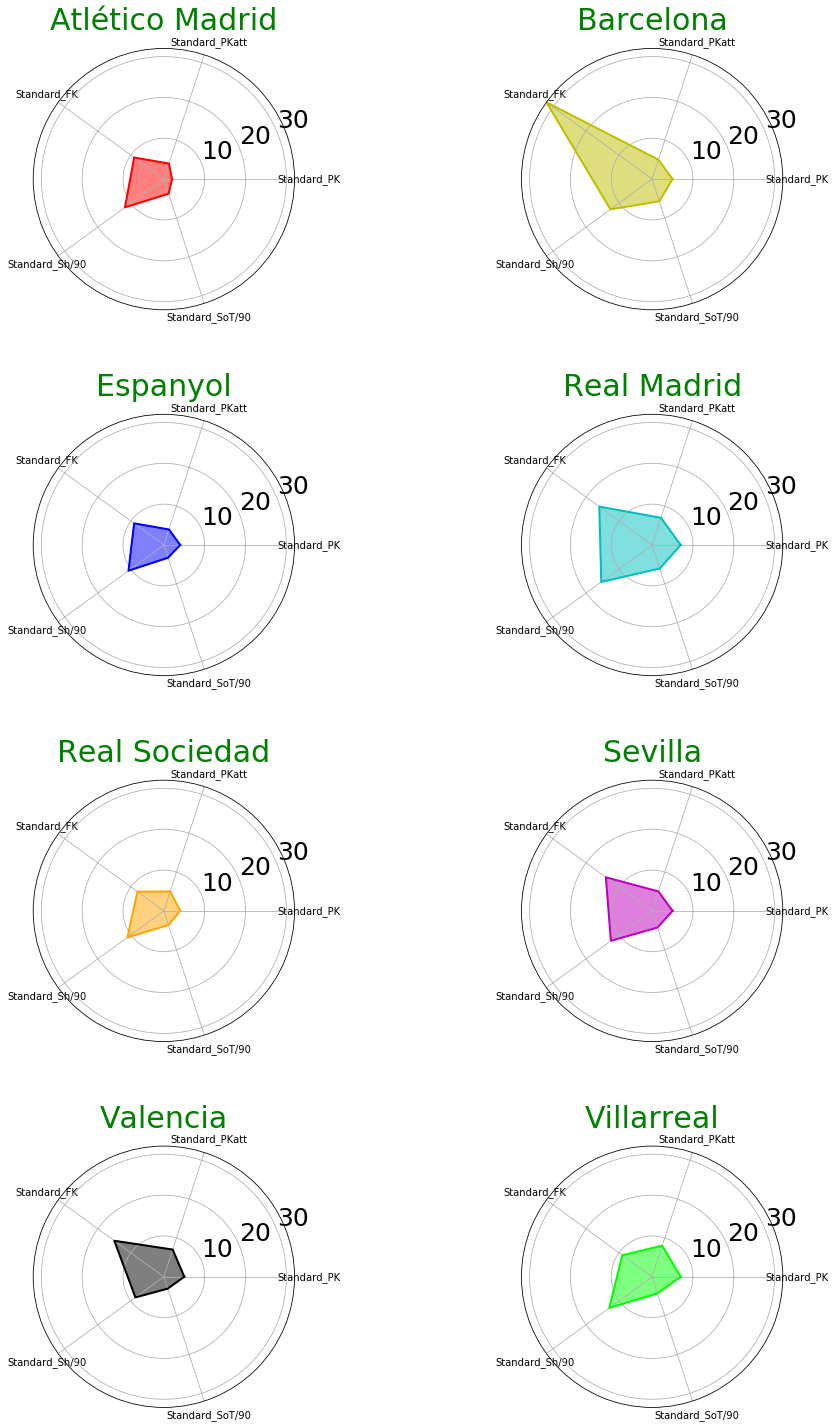

In [241]:
rdr(num,c,play,cols,string)

# Radar Chat - Shooting 2 - Expected Goals and Goals/Shots

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


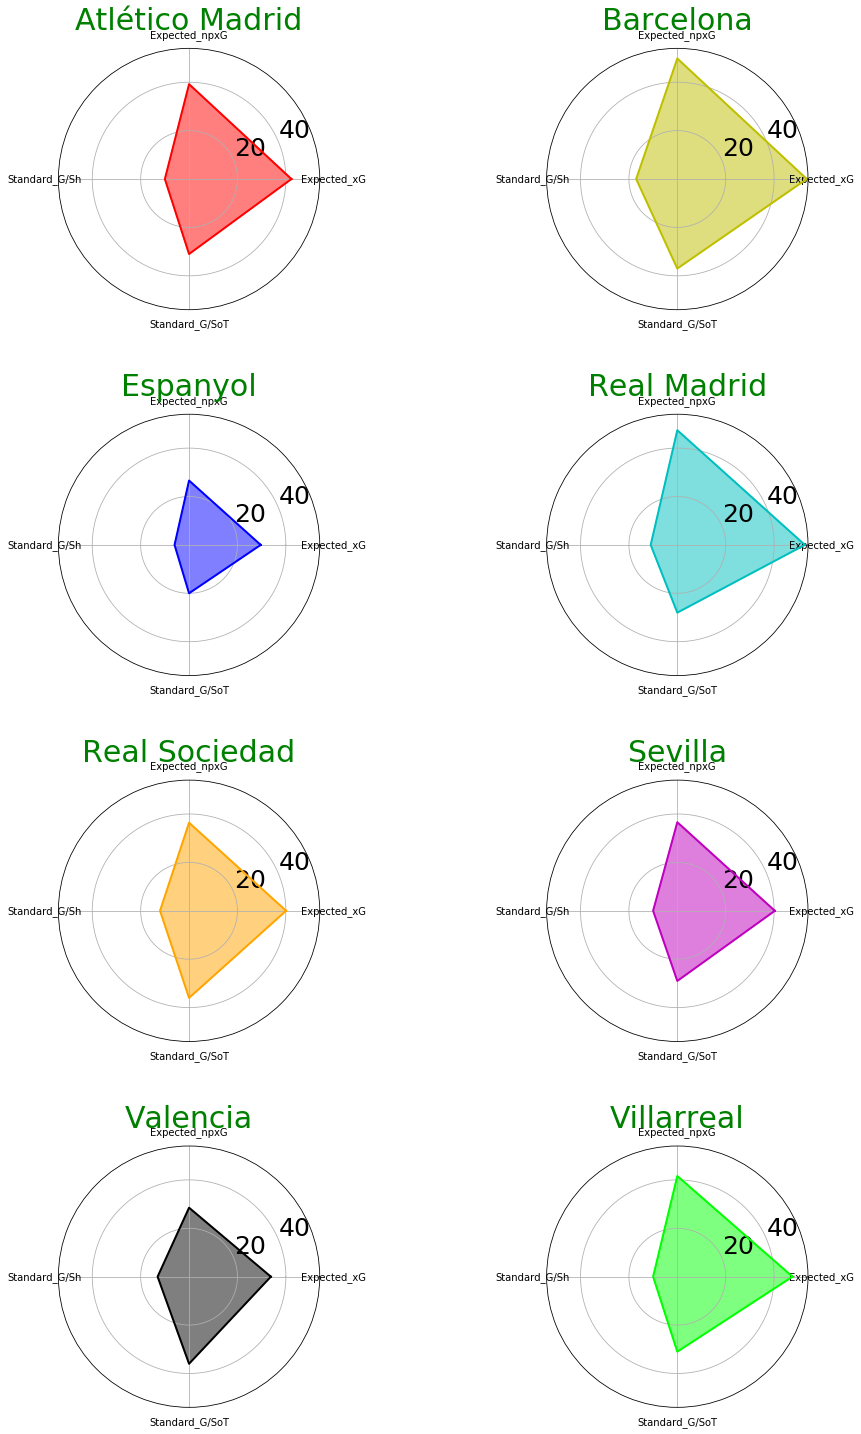

In [242]:
from math import pi
import math
string1 = ['Barcelona', 'Real Madrid','Atlético Madrid', 'Sevilla' ,'Valencia','Villarreal','Espanyol','Real Sociedad']
play1 = shoo[shoo["Squad"].isin(string1)]
play1['Standard_G/Sh'] = play1['Standard_G/Sh'].apply(lambda x: x*100)
play1['Standard_G/SoT'] = play1['Standard_G/SoT'].apply(lambda x: x*100)
cols1   = ['Squad','Expected_xG', 'Expected_npxG','Standard_G/Sh', 'Standard_G/SoT']
play1 = play1[cols1]
play1 = play1.groupby("Squad")[cols1].mean().reset_index()
num1 = [0,1,2,3,4,5,6,7]
c1 = ["r","y","b","c","orange","m","k","lime"]
rdr(num1,c1,play1,cols1,string1)



# Defensive - Tackles

Insights:

- Atletico Madrid has very high Tackles per Season especially in the Mid 3 rd indicating they press heavily in that area of the pitch 
- Valencia and Barcelona dont tackle a lot in the midfield
- Surprsingly, Real Sociedad commits to tackles a lot in the mid 3 rd than in the final 3 rd. This generally indicates a high defensive line trying to play offside or playing attacking line
- The graphs are consistent in shape 

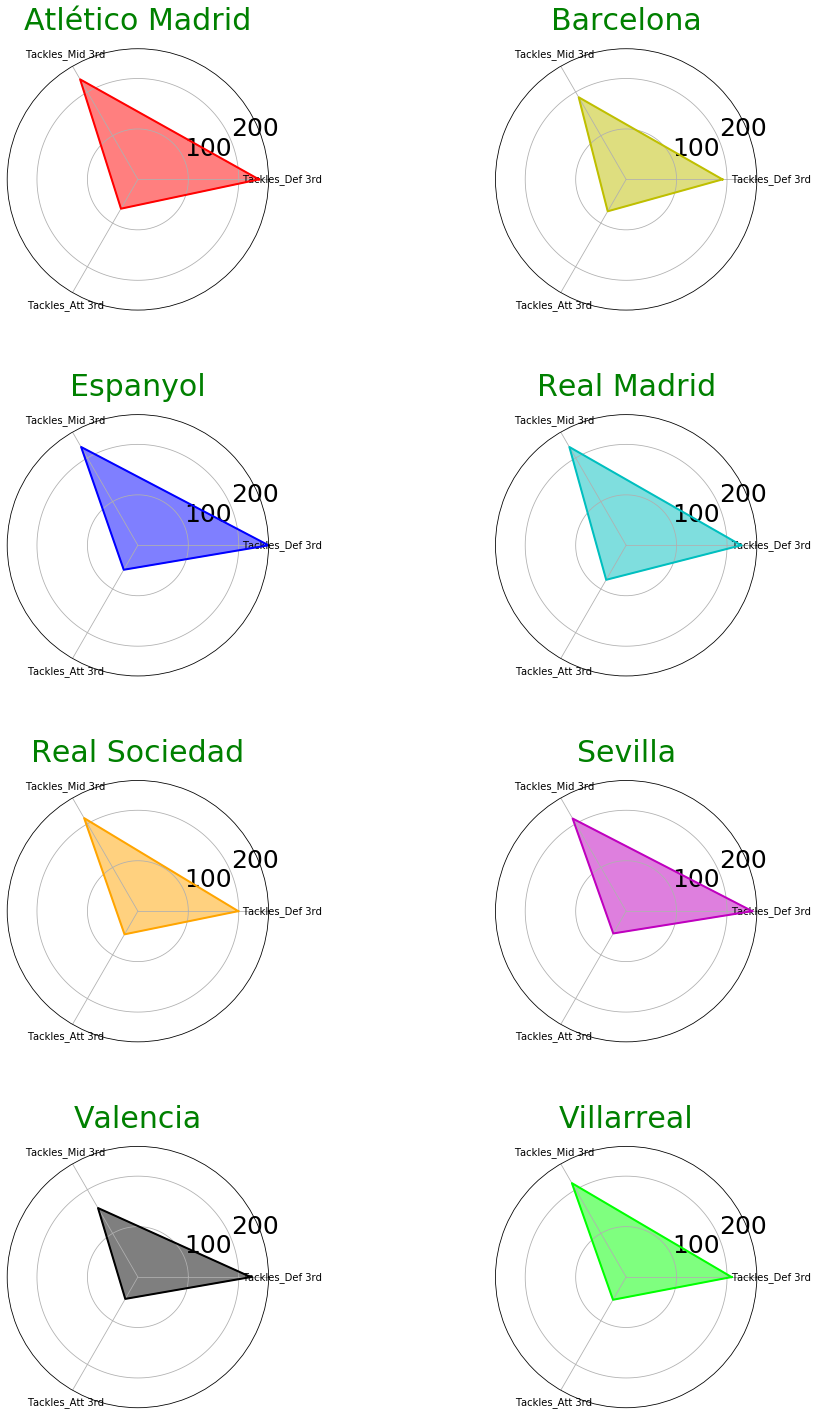

In [244]:
defe.rename({'Unnamed: 0_level_0_Squad':'Squad'},axis=1, inplace=True)
string2 = ['Barcelona', 'Real Madrid','Atlético Madrid', 'Sevilla' ,'Valencia','Villarreal','Espanyol','Real Sociedad']
play2 = defe[defe["Squad"].isin(string2)]
cols2   = ['Squad','Tackles_Def 3rd', 'Tackles_Mid 3rd', 'Tackles_Att 3rd']
play2 = play2[cols2]
play2 = play2.groupby("Squad")[cols2].mean().reset_index()
num2 = [0,1,2,3,4,5,6,7]
c2 = ["r","y","b","c","orange","m","k","lime"]
rdr(num2,c2,play2,cols2,string2)



Text(0.5, 1.0, 'MATCHES VS GOALS BY TEAMS')

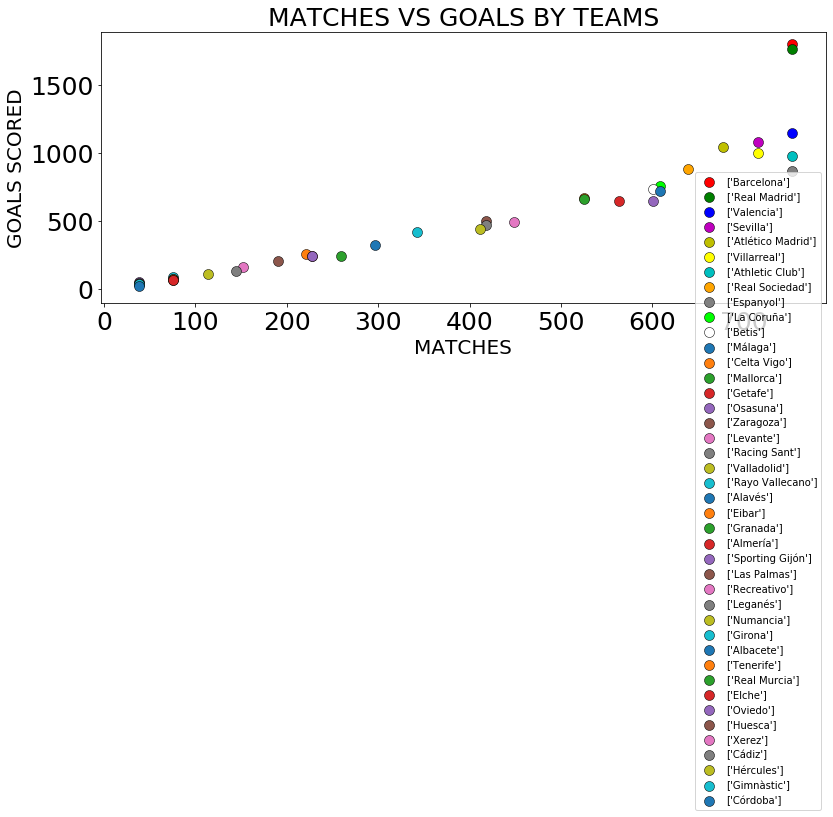

In [311]:
x = ovr.groupby(["Squad"]).agg({"MP":"sum","GF":"sum"}).reset_index()
x

x = x.sort_values(by="GF",ascending=False)
plt.figure(figsize=(13,5))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"]
lg = x["Squad"].unique()
for i,j,k in itertools.zip_longest(lg,range(len(lg)),c):
    plt.scatter("MP","GF",data=x[x["Squad"] == i],label=[i],s=100,alpha=1,linewidths=0.5,edgecolors="k",color=k)
    plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5),prop={'size': 10} )
    plt.xlabel("MATCHES",size=20 )
    plt.ylabel("GOALS SCORED", size=20)

plt.title("MATCHES VS GOALS BY TEAMS", size=25)


Text(0.5, 1.0, 'DRAWS VS GOALS BY TEAMS')

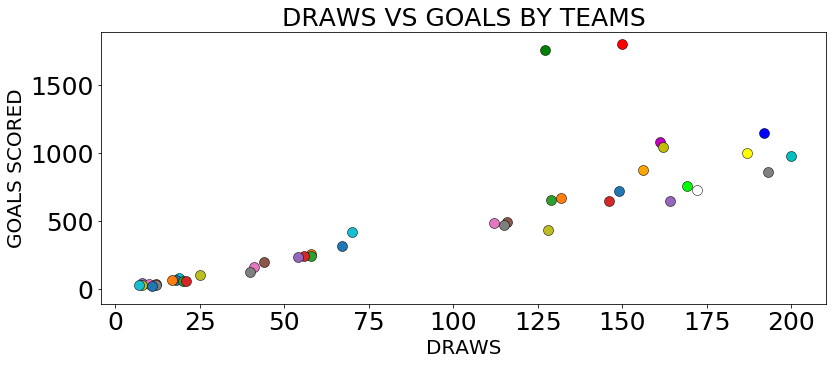

In [310]:

x1 = ovr.groupby(["Squad"]).agg({"D":"sum","GF":"sum"}).reset_index()
x1

x1 = x1.sort_values(by="GF",ascending=False)
plt.figure(figsize=(13,5))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"]


for i,j,k in itertools.zip_longest(lg,range(len(lg)),c):
    plt.scatter("D","GF",data=x1[x1["Squad"] == i],label=[i],s=100,alpha=1,linewidths=0.5,edgecolors="k",color=k)
    #plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5),prop={'size': 10} )
    plt.xlabel("DRAWS",size=20 )
    plt.ylabel("GOALS SCORED", size=20)

plt.title("DRAWS VS GOALS BY TEAMS", size=25)